# Q6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

From the symmetry of the problem we assign z axis to the axis of the rod and x, y axis remain in the plain. We convert the problem in  cylindrical coordinate system. The force experienced by the ball, when it is at (x,y,0) from an element of the rod at (0,0,z) is, 

$$F=\frac{G(dM)m}{x^2+y^2+z^2} \hat{a}$$

a denoting the separation between the ball and the element. Clearly, the force towards z axis cancels out when we integrate over all the elements, it is evident from the symmetry of the problem at hand. The radial force is:

$$F_{r}= \frac{G(dM)m\sqrt{x^2+y^2}}{(x^2+y^2+z^2)^{3/2}}$$

putting $dM=(M/L) dz$ and integrating from -L/2 to L/2 we have:
$$F=\frac{GMm}{L} \int_{-L/2}^{L/2}\frac{dz \sqrt{x^2+y^2}}{(x^2+y^2+z^2)^{3/2}}$$

which, according to the question can be calculated in close form as:

$$F= \frac{GMm}{\sqrt{(x^2+y^2)(x^2+y^2+L^2/4)}}$$


$$\ddot{x}= -\frac{GMm}{m} \frac{x}{\sqrt{(x^2+y^2)}\sqrt{(x^2+y^2)(x^2+y^2+L^2/4)}}=-\frac{GMx}{r^2\sqrt{r^2+L^2/4}}$$

Similarly, 

$$\ddot{y}= -\frac{GMm}{m} \frac{y}{\sqrt{(x^2+y^2)}\sqrt{(x^2+y^2)(x^2+y^2+L^2/4)}}=-\frac{GMy}{r^2\sqrt{r^2+L^2/4}}$$


we define $vx=\dot{x}$, $vy=\dot{y}$

So, that the equations become:

$$\dot{vx}= -\frac{GMm}{m} \frac{x}{\sqrt{(x^2+y^2)}\sqrt{(x^2+y^2)(x^2+y^2+L^2/4)}}=-\frac{GMx}{r^2\sqrt{r^2+L^2/4}}$$

$$\dot{vy}= -\frac{GMm}{m} \frac{y}{\sqrt{(x^2+y^2)}\sqrt{(x^2+y^2)(x^2+y^2+L^2/4)}}=-\frac{GMy}{r^2\sqrt{r^2+L^2/4}}$$



In [10]:
def funcx(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    return x1

def funcy(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    return y1

def funcx1(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    r=math.sqrt(x**2+y**2)
    return -(G*M*x/(r**2*math.sqrt(r**2+L**2/4)))

def funcy1(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    r=math.sqrt(x**2+y**2)
    return -(G*M*y/(r**2*math.sqrt(r**2+L**2/4)))

def func(vec,t):
    return np.array([funcx(vec,t), funcy(vec, t), funcx1(vec,t), funcy1(vec, t)])

In [11]:
def RK_4(x, t, func, h):
    f=func(x,t)
    k1=h*f
    k2=h*func(x+k1/2, t+h/2)
    k3=h*func(x+k2/2, t+h/2)
    k4=h*func(x+k3, t+h)
    x= x + (k1+2*k2+2*k3+k4)/6
    t= t + h
    return [x,t]

In [16]:
h=0.01

G=1
M=10
L=2

x=1
y=0
x1=0
y1=1

X=[1]
Y=[0]
X1=[x1]
Y1=[y1]
t=0

vec=np.array([x,y,x1,y1])

while(t<=10):
    vec=RK_4(vec, t, func, h)[0]
    t=RK_4(vec, t, func, h)[1]
    X.append(vec[0])
    Y.append(vec[1])

Text(0.5, 1.0, 'trajectory(m)')

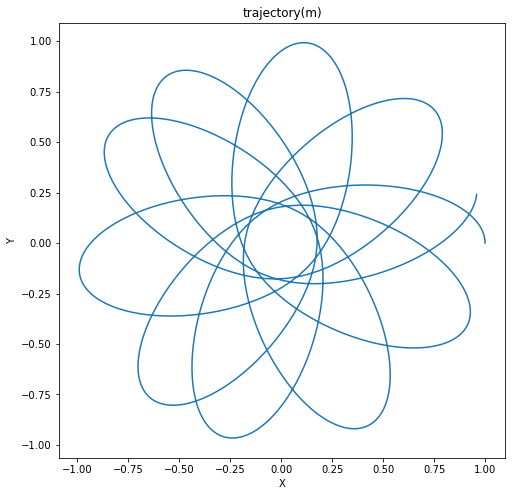

In [17]:
plt.figure(figsize=(8,8))
plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('trajectory(m)')